<a href="https://colab.research.google.com/github/JoelAbadi/DI-Bootcamp/blob/main/daily_challenge_W9_D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Required sample size per group to detect a change from 5% to 7% conversion: 2199 users

 Sample size per group for different effect sizes:
  Effect Size 0.1 ➜ Sample Size ≈ 1570 users
  Effect Size 0.2 ➜ Sample Size ≈ 393 users
  Effect Size 0.3 ➜ Sample Size ≈ 175 users
  Effect Size 0.4 ➜ Sample Size ≈ 99 users


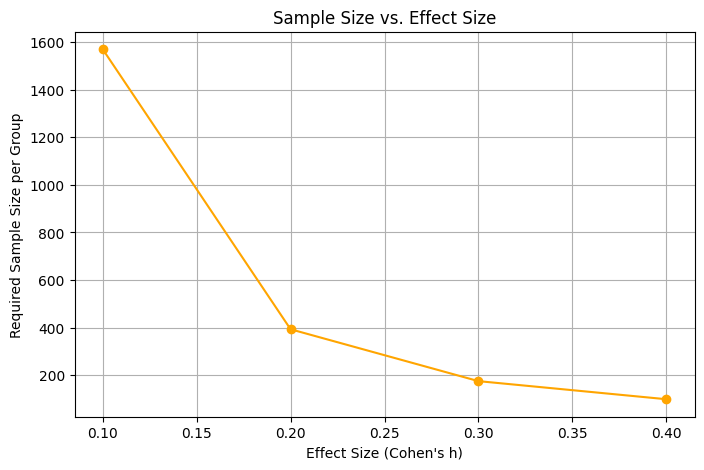


 Fun Explanation for Sweet Bytes Team:

Imagine you're testing two cookie recipes. 
If one is *clearly* tastier (big effect), even a few taste testers will agree.
But if the difference is *barely noticeable* (small effect), you'll need *lots* of tasters to be sure. 👩‍🍳👨‍🍳
That's what we're doing here with checkout designs: measuring how big the improvement is.

📏 Bigger improvements ➜ fewer users needed.
📊 Smaller improvements ➜ more users to be sure.
So we carefully balance the number of users with the expected improvement to save time, traffic, and sweet sales! 🍰💰


In [1]:
# 📦 Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import NormalIndPower

power_analysis = NormalIndPower()

# 🍪 Step 1: Calculate required sample size for the main A/B test
# Parameters
baseline_rate = 0.05     # Current conversion rate (5%)
new_rate = 0.07          # Expected new conversion rate (7%)
alpha = 0.05             # Significance level
power = 0.8              # Desired power

# Calculate effect size using Cohen's h for proportions
def cohen_h(p1, p2):
    return 2 * np.arcsin(np.sqrt(p2)) - 2 * np.arcsin(np.sqrt(p1))

effect_size = cohen_h(baseline_rate, new_rate)

# Calculate sample size per group
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
sample_size = int(np.ceil(sample_size))

print(f" Required sample size per group to detect a change from 5% to 7% conversion: {sample_size} users")

#  Step 2: Analyze sample size impact across different effect sizes
effect_sizes = [0.1, 0.2, 0.3, 0.4]
sample_sizes = []

for es in effect_sizes:
    n = power_analysis.solve_power(effect_size=es, alpha=alpha, power=power, alternative='two-sided')
    sample_sizes.append(np.ceil(n))

print("\n Sample size per group for different effect sizes:")
for es, n in zip(effect_sizes, sample_sizes):
    print(f"  Effect Size {es:.1f} ➜ Sample Size ≈ {int(n)} users")

#  Optional: Plot sample size vs. effect size
plt.figure(figsize=(8, 5))
plt.plot(effect_sizes, sample_sizes, marker='o', color='orange')
plt.title('Sample Size vs. Effect Size')
plt.xlabel('Effect Size (Cohen\'s h)')
plt.ylabel('Required Sample Size per Group')
plt.grid(True)
plt.show()

# 🍭 Step 3: Fun explanation for the bakery team
print("\n Fun Explanation for Sweet Bytes Team:\n")
print("Imagine you're testing two cookie recipes. ")
print("If one is *clearly* tastier (big effect), even a few taste testers will agree.")
print("But if the difference is *barely noticeable* (small effect), you'll need *lots* of tasters to be sure. 👩‍🍳👨‍🍳")
print("That's what we're doing here with checkout designs: measuring how big the improvement is.")
print("\n📏 Bigger improvements ➜ fewer users needed.\n📊 Smaller improvements ➜ more users to be sure.")
print("So we carefully balance the number of users with the expected improvement to save time, traffic, and sweet sales! 🍰💰")
